In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#import datasets 
test = pd.read_csv(r'C:\Users\akobe\OneDrive\Desktop\Lighthouse\After\Kaggle-Titanic-Machine-Learning-from-Disaster\Data\test.csv')
train = pd.read_csv(r'C:\Users\akobe\OneDrive\Desktop\Lighthouse\After\Kaggle-Titanic-Machine-Learning-from-Disaster\Data\train.csv')

In [12]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.92,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.10,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.05,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.86,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.08,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.13,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.07,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.70,S


In [4]:
#drop cabin column - as most of the data is missing
train = train.drop(['Cabin'], axis=1)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 66.8+ KB


In [6]:
#replace missing values with NaN
cols_missing_vals = ['Age', 'Embarked'] # cols with missing values 
train[cols_missing_vals] = train[cols_missing_vals].replace(0, np.NaN) 

In [7]:
#drop NaNs
train = train.dropna(subset= ['Age', 'Embarked'])

In [8]:
#round fare to 2 decimal places 
train = train.round({'Fare': 2})

In [9]:
#change sex - male = 0, female = 1
train['Sex'] = train['Sex'].replace(['male', 'female'], [0, 1])

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567346
std,258.683191,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938696
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645000
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.330000


<AxesSubplot:>

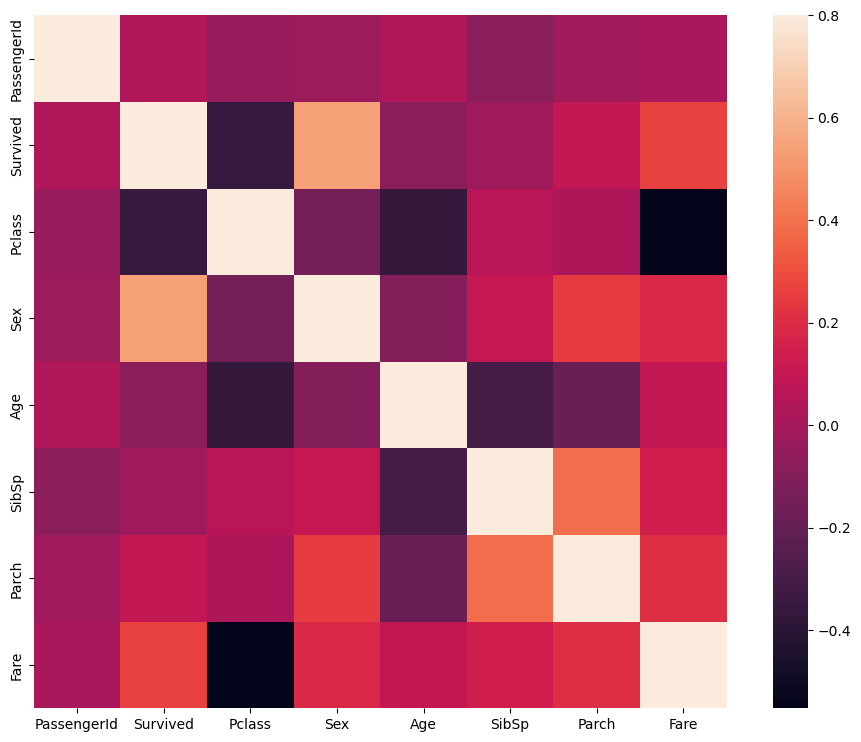

In [13]:
# correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

### Data Engineering 

In [14]:
#separate out the title from the name - split at the comma. 
#separate out the title from the name - split at the period. 
train['Title_front'] = train['Name'].str.split(',').str[1] 
train['Title'] = train['Title_front'].str.split('.').str[0] 
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title_front,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,S,Mr. Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.28,C,Mrs. John Bradley (Florence Briggs Thayer),Mrs


In [15]:
#drop columns "Name" and "Title_front"
train = train.drop(['Name', 'Title_front'], axis=1)

In [16]:
#find all the unique title values 
train['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Title_new
0,1,0,3,0,22.0,1,0,A/5 21171,7.25,S,Mr,tester
1,2,1,1,1,38.0,1,0,PC 17599,71.28,C,Mrs,tester
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.92,S,Miss,tester
3,4,1,1,1,35.0,1,0,113803,53.10,S,Mrs,tester
4,5,0,3,0,35.0,0,0,373450,8.05,S,Mr,tester


In [49]:
#create funtion to replace the title names to 4 titles 
def replace_titles(df):
    
    """ replace titles to limit to 4 (Mr., Mrs., Master, Miss.) 
        Mr. = Don, Major, Capt. Jonkheer, Rev, Col, Sir, Dr
        Mrs. = the Countess, Mme, Lady, Dr.
        Miss. = Mlle, Ms
        Master """
    
    title_new = []
    
    for i in df['Title']:
        if i == 'Don':
            title_new.append('Mr')
        elif i == 'Major':
            title_new.append('Mr')
        elif i == 'Capt':
            title_new.append('Mr')
        elif i == 'Jonkheer':
            title_new.append('Mr')
        elif i == 'Rev':
            title_new.append('Mr')
        elif i == 'Col':
            title_new.append('Mr')
        elif i == 'Sir':
            title_new.append('Mr')
        elif i == 'Mr':
            title_new.append('Mr')
        elif i == 'Countess':
            title_new.append('Mrs')
        elif i == 'Mme':
            title_new.append('Mrs')
        elif i == 'Mrs':
            title_new.append('Mrs')
        elif i == 'Mlle':
            title_new.append('Miss')
        elif i == 'Ms':
            title_new.append('Miss')
        elif i == 'Miss':
            title_new.append('Miss')
        elif i == 'Dr' and df['Sex'] == 0:
            title_new.append('Mr')
        elif i == 'Dr' and df['Sex'] == 1:
            title_new.append('Mrs')
        else: 
            title_new.append(i)
    
    df['Title_new'] = title_new   

In [ ]:
#    title = df['Title']
    
#    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir']:
#        return 'Mr'
#    elif title in ['Countess', 'Mme']:
#        return 'Mrs'
#    elif title in ['Mlle', 'Ms']:
#        return 'Miss'
#    elif title == 'Dr' and df['Sex'] == 0:
#        return 'Mr'
#    elif title == 'Dr' and df['Sex'] == 1:
#        return 'Mrs'
#    else: 
#        return title 

In [50]:
#replace the title names 
replace_titles(train)
train.head(25)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Title_new
0,1,0,3,0,22.0,1,0,A/5 21171,7.25,S,Mr,tester
1,2,1,1,1,38.0,1,0,PC 17599,71.28,C,Mrs,tester
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.92,S,Miss,tester
3,4,1,1,1,35.0,1,0,113803,53.10,S,Mrs,tester
4,5,0,3,0,35.0,0,0,373450,8.05,S,Mr,tester
6,7,0,1,0,54.0,0,0,17463,51.86,S,Mr,tester
7,8,0,3,0,2.0,3,1,349909,21.08,S,Master,tester
8,9,1,3,1,27.0,0,2,347742,11.13,S,Mrs,tester
9,10,1,2,1,14.0,1,0,237736,30.07,C,Mrs,tester
10,11,1,3,1,4.0,1,1,PP 9549,16.70,S,Miss,tester
